# `sns.barplot()` 详细介绍

`seaborn.barplot()` 是 Seaborn 库中用于绘制条形图的函数，主要用于展示分类变量的数值比较。它不仅可以显示各类别的均值（或其他统计量），还能通过误差条直观展示数据的置信区间或变异程度。

## 基本语法

```python
sns.barplot(
    x=None, 
    y=None, 
    hue=None, 
    data=None, 
    order=None, 
    hue_order=None,
    estimator=np.mean, 
    ci=95, 
    n_boot=1000, 
    units=None,
    seed=None, 
    orient=None, 
    color=None, 
    palette=None,
    saturation=0.75, 
    errcolor='.26', 
    errwidth=None,
    capsize=None, 
    dodge=True, 
    ax=None, 
    **kwargs
)
```

## 核心参数说明

1. **数据参数**：
   - `x`, `y`：指定分类变量和数值变量（一个为分类轴，一个为数值轴）
   - `hue`：用于分组的次级分类变量（创建堆叠/并排条形图）
   - `data`：DataFrame 数据源

2. **统计参数**：
   - `estimator`：用于聚合的函数（默认为 `np.mean`）
   - `ci`：置信区间大小（可设为 "sd" 显示标准差，或 None 不显示）
   - `n_boot`：计算置信区间时的自助采样次数

3. **样式参数**：
   - `palette`：调色板名称或颜色列表
   - `saturation`：颜色饱和度（0-1）
   - `errcolor`：误差条颜色
   - `capsize`：误差条端帽大小

4. **布局参数**：
   - `order`：指定分类变量的显示顺序
   - `hue_order`：指定 hue 分组的显示顺序
   - `orient`：强制指定方向（"v" 垂直或 "h" 水平）

## 基本用法示例

```python
import seaborn as sns
import matplotlib.pyplot as plt

# 加载示例数据集
tips = sns.load_dataset("tips")

# 基本条形图
plt.figure(figsize=(8, 6))
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("每日平均消费金额")
plt.show()

# 添加分组(hue)
plt.figure(figsize=(8, 6))
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("按性别分组的每日平均消费")
plt.show()

# 水平条形图
plt.figure(figsize=(8, 6))
sns.barplot(x="total_bill", y="day", data=tips, orient="h")
plt.title("水平条形图展示")
plt.show()
```

## 高级用法

1. **更改聚合函数**：
   ```python
   # 使用中位数而非均值
   sns.barplot(x="day", y="total_bill", data=tips, estimator=np.median)
   ```

2. **自定义误差条**：
   ```python
   # 显示标准差而非置信区间
   sns.barplot(x="day", y="total_bill", data=tips, ci="sd")

   # 不显示误差条
   sns.barplot(x="day", y="total_bill", data=tips, ci=None)
   ```

3. **调整分组条形的排列**：
   ```python
   # 禁用dodge效果（堆叠而非并排）
   sns.barplot(x="day", y="total_bill", hue="sex", data=tips, dodge=False)
   ```

## 注意事项

1. 条形高度默认表示的是各组数据的均值（可通过 `estimator` 参数更改）
2. 误差条默认显示 95% 置信区间（可通过 `ci` 参数调整）
3. 当使用 `hue` 参数时，默认会创建并排条形图（可通过 `dodge` 参数控制）
4. 与 `sns.catplot(kind="bar")` 不同，`barplot()` 直接在当前轴上绘图

`barplot()` 特别适合用于比较不同类别间的统计量差异，是探索性数据分析中常用的可视化工具。

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

这段代码使用 Seaborn 和 Matplotlib 创建了一个堆叠条形图，用于比较美国各州每十亿英里行驶里程的汽车事故总数与其中涉及酒精的事故数。

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


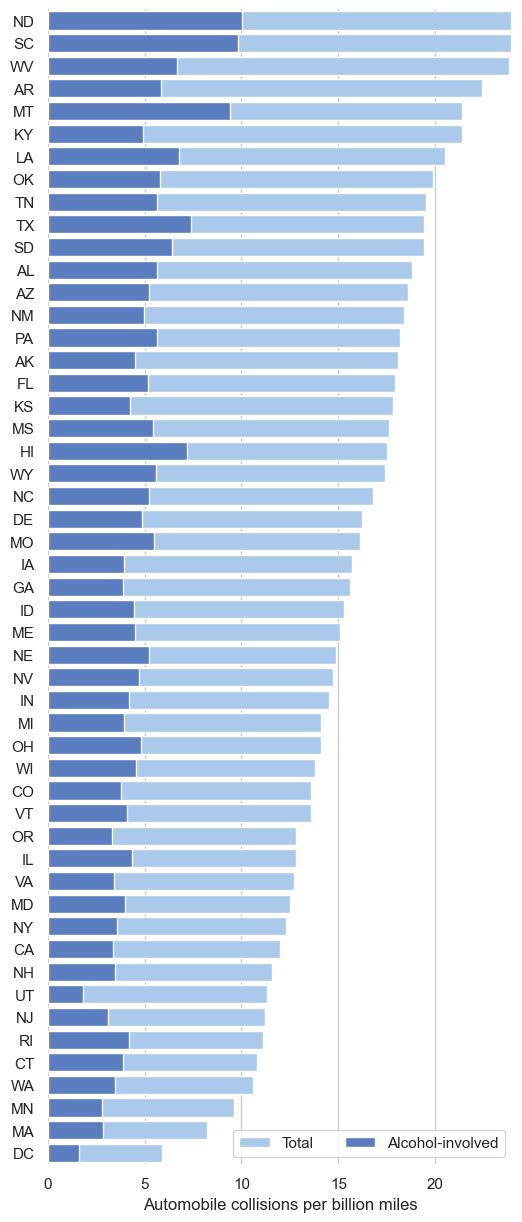

In [5]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
# 加载 Seaborn 内置的汽车事故数据集，包含美国各州的事故统计数据（如 total 总事故数、alcohol 酒精相关事故数等）。
# 按总事故数 (total) 降序排序，使图表中的州从上到下按事故数从高到低排列。
crashes = pd.read_csv("seaborn-data/car_crashes.csv").sort_values("total", ascending=False)
display(crashes)

# Plot the total crashes
# 绘制总事故数条形图
sns.set_color_codes("pastel")   # 设置颜色为柔和的 "pastel"（浅色）调色板。
sns.barplot(
    x="total",      # 用总事故数 (total) 作为条形长度（横轴）
    y="abbrev",     # 用州缩写 (abbrev) 作为分类标签（纵轴）
    data=crashes,
    label="Total",  # 为图例设置标签名称为 "Total"
    color="b"       # 条形颜色为蓝色（blue）
    )

# Plot the crashes where alcohol was involved
# 绘制酒精相关事故条形图
sns.set_color_codes("muted")    # 切换颜色为更深的 "muted"（深色）调色板
# 关键点：因为 dodge 参数默认为 True，但两个条形图的 y 轴相同，所以第二个条形图会覆盖第一个条形图的一部分，
# 形成视觉上的堆叠效果（实际是并排，但因颜色和位置设计看起来像堆叠）。
sns.barplot(
    x="alcohol",    # 用酒精相关事故数 (alcohol) 作为条形长度
    y="abbrev",
    data=crashes,
    label="Alcohol-involved",
    color="b"
    )

# Add a legend and informative axis label
# 图例分两列显示, 位于图形右下角, 添加边框。
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Automobile collisions per billion miles")
# 移除左侧和底部的边框线（保留顶部和右侧），使图表更简洁。
sns.despine(left=True, bottom=True)

这段代码使用 Seaborn 和 Matplotlib 创建了一个包含三个子图的条形图展示，分别演示了三种不同类型的数据可视化：顺序数据(Sequential)、发散数据(Diverging)和定性数据(Qualitative)。

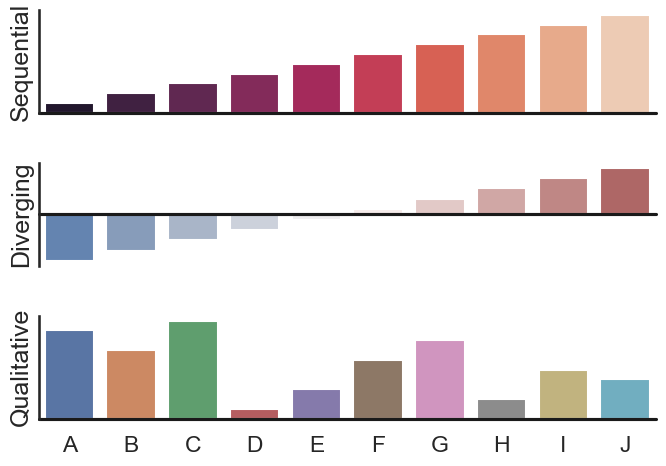

In [8]:
# 使用适合演讲的上下文设置(context="talk")，这会增大字体和线条粗细
sns.set_theme(style="white", context="talk")
# 创建随机数生成器实例，种子为8以保证可重复性
rs = np.random.RandomState(8)

# 创建一个3行1列的子图布局，图形大小为7x5英寸
# sharex=True表示所有子图共享x轴
# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# 顺序数据(Sequential)图表
# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
# 使用rocket调色板(一种从暗到亮的连续调色板)绘制条形图
sns.barplot(x=x, y=y1, hue=x, palette="rocket", ax=ax1)
# 添加黑色水平基线
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# 发散数据(Diverging)图表
# Center the data to make it diverging
y2 = y1 - 5.5
# 使用vlag调色板(一种从蓝到红、中间为白的发散调色板)
sns.barplot(x=x, y=y2, hue=x, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# 定性数据(Qualitative)图表
# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
# 使用deep调色板(一组区分度高的定性颜色)
sns.barplot(x=x, y=y3, hue=x, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)    # 移除底部边框线
plt.setp(f.axes, yticks=[]) # 移除所有子图的y轴刻度
plt.tight_layout(h_pad=2)   # 调整子图间距，垂直间距为2